##Analysis: Why Is "That" Song Popular?

<p>An exploratory analysis of the top streamed songs of 2018 from Spotify..
The purpose of this analysis is to compare/differentiate the audio features of popular songs. I used the audio features from Spotify's top streamed songs of 2018 to draw some conclusions about why people like music. </p>

##Hypothesis: Is My Favorite Song Popular?
<p>I explored the audio features of my favorite songs and developed hypothesis about these features. I wanted to know if my songs share similarity and difference in the audio features of the top 2018 songs. I was suprised with my findings.</p>


##1. Import **Data**
The data was extracted from Spotify's API and 'spotipy's' python library. The data was downloaded from Kaggle.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# Import pandas and read in our GDrive-mounted csv

import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/top2018.csv')


##2. Exploratory Analysis

In [ ]:
df.shape

(100, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
id                  100 non-null object
name                100 non-null object
artists             100 non-null object
danceability        100 non-null float64
energy              100 non-null float64
key                 100 non-null float64
loudness            100 non-null float64
mode                100 non-null float64
speechiness         100 non-null float64
acousticness        100 non-null float64
instrumentalness    100 non-null float64
liveness            100 non-null float64
valence             100 non-null float64
tempo               100 non-null float64
duration_ms         100 non-null float64
time_signature      100 non-null float64
dtypes: float64(13), object(3)
memory usage: 12.6+ KB


In [ ]:
pd.set_option('display.max_rows', 101)

In [ ]:
df.head(10)

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.5520,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.1230,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.1310,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.1120,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.3960,0.350,91.030,217925.0,4.0
5,7dt6x5M1jzdTEt8oCbisT,Better Now,Post Malone,0.680,0.563,10.0,-5.843,1.0,0.0454,0.3540,0.000000,0.1360,0.374,145.028,231267.0,4.0
6,58q2HKrzhC3ozto2nDdN4,I Like It,Cardi B,0.816,0.726,5.0,-3.998,0.0,0.1290,0.0990,0.000000,0.3720,0.650,136.048,253390.0,4.0
7,7ef4DlsgrMEH11cDZd32M,One Kiss (with Dua Lipa),Calvin Harris,0.791,0.862,9.0,-3.240,0.0,0.1100,0.0370,0.000022,0.0814,0.592,123.994,214847.0,4.0
8,76cy1WJvNGJTj78UqeA5z,IDGAF,Dua Lipa,0.836,0.544,7.0,-5.975,1.0,0.0943,0.0403,0.000000,0.0824,0.510,97.028,217947.0,4.0
9,08bNPGLD8AhKpnnERrAc6,FRIENDS,Marshmello,0.626,0.880,9.0,-2.384,0.0,0.0504,0.2050,0.000000,0.1280,0.534,95.079,202621.0,4.0


In [ ]:
df.tail()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
95,630sXRhIcfwr2e4RdNtjK,Rewrite The Stars,Zac Efron,0.684,0.619,10.0,-7.005,1.0,0.0386,0.0716,0.000000,0.1220,0.2840,125.046,217440.0,4.0
96,2xmrfQpmS2iJExTlklLoA,I Miss You (feat. Julia Michaels),Clean Bandit,0.638,0.658,3.0,-6.318,1.0,0.0456,0.2450,0.000004,0.0919,0.3300,105.076,205748.0,4.0
97,5WvAo7DNuPRmk4APhdPzi,No Brainer,DJ Khaled,0.552,0.760,0.0,-4.706,1.0,0.3420,0.0733,0.000000,0.0865,0.6390,135.702,260000.0,5.0
98,1j4kHkkpqZRBwE0A4CN4Y,Dusk Till Dawn - Radio Edit,ZAYN,0.258,0.437,11.0,-6.593,0.0,0.0390,0.1010,0.000001,0.1060,0.0967,180.043,239000.0,4.0
99,3EPXxR3ImUwfayaurPi3c,Be Alright,Dean Lewis,0.553,0.586,11.0,-6.319,1.0,0.0362,0.6970,0.000000,0.0813,0.4430,126.684,196373.0,4.0


##3. Column Defintions

##<p>Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. </p>

##<p>Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.  </p>

##<p>Valence is a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).  </p>

##<p>The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. </p>

##<p>The mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0. Major keys have a bright, happy, and cheerful melody; while minor keys sound more melancholy and sad.  </p>


##4. Top Artists

In [ ]:
top_artists = df['artists'].value_counts()
top_artists.head(18)

XXXTENTACION       6
Post Malone        6
Drake              4
Marshmello         3
Ed Sheeran         3
Khalid             2
Ariana Grande      2
Kendrick Lamar     2
Ozuna              2
Imagine Dragons    2
Clean Bandit       2
Dua Lipa           2
Migos              2
Camila Cabello     2
Calvin Harris      2
Selena Gomez       2
The Weeknd         2
Maroon 5           2
Name: artists, dtype: int64

##There are a total of 18 artists that had more than 1 most streamed song. XXXTENTACION and Post Malone have the most streamed songs of 2018. I will look at the audio features of XXXTENTACION and Post Malone later in the notebook.

##5. Loudness and Energy Correlation
##I have included a reference for Pearson's correlation coefficient.
 <table>
  <tr>
    <th>Strength of Association</th>
    <th>Positive</th> 
    <th>Negative</th>
  </tr>
  <tr>
    <td>Small</td>
    <td>	0.1 to 0.3</td>
    <td>	-0.1 to -0.3</td>
  </tr>
  <tr>
    <td>Moderate</td>
    <td>0.3 to 0.5</td>
    <td>-0.3 to -0.5</td>
  </tr>
  <tr>
    <td>Strong</td>
    <td>0.5 to 1.0</td>
    <td>-0.5 to -1.0</td>
  </tr>
</table>

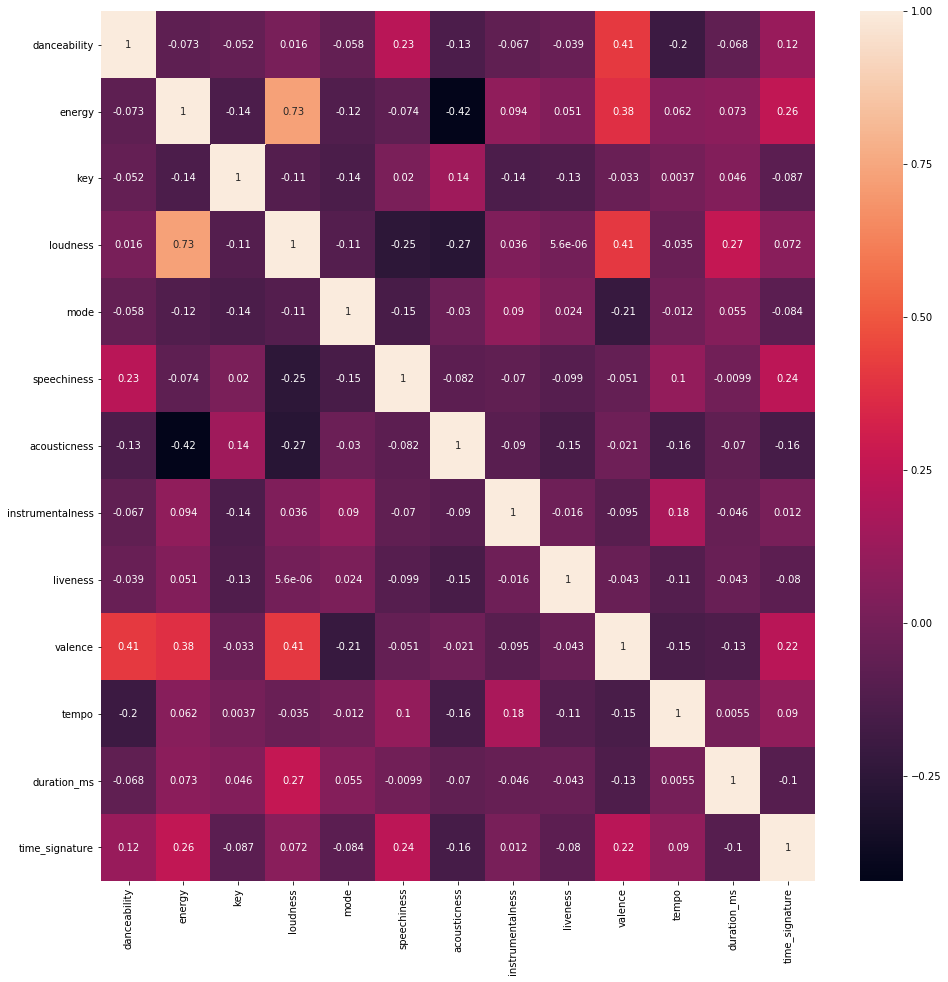

In [ ]:
plt.figure(figsize=(16,16))
corr_matrix=df.corr()

sns.heatmap(corr_matrix,  annot=True)
plt.show()

In [ ]:
pip install matplotlib==3.1.0

     |████████████████████████████████| 13.1MB 186kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.0.3
    Uninstalling matplotlib-3.0.3:
      Successfully uninstalled matplotlib-3.0.3


In [ ]:
df.corr(method ='pearson') 

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
danceability,1.000000,-0.072582,-0.051759,0.015517,-0.058019,0.227075,-0.134374,-0.066592,-0.038761,0.413855,-0.195012,-0.068368,0.119421
energy,-0.072582,1.000000,-0.136345,0.732719,-0.117555,-0.073591,-0.421209,0.093684,0.050542,0.382434,0.062272,0.073017,0.255235
key,-0.051759,-0.136345,1.000000,-0.105309,-0.141568,0.019583,0.141590,-0.136607,-0.125443,-0.032622,0.003737,0.046144,-0.087096
loudness,0.015517,0.732719,-0.105309,1.000000,-0.110178,-0.252037,-0.269742,0.036248,0.000006,0.407760,-0.035156,0.265310,0.072301
mode,-0.058019,-0.117555,-0.141568,-0.110178,1.000000,-0.150076,-0.030028,0.089667,0.024428,-0.210599,-0.011911,0.055411,-0.083782
speechiness,0.227075,-0.073591,0.019583,-0.252037,-0.150076,1.000000,-0.081536,-0.069543,-0.099379,-0.051054,0.102999,-0.009856,0.235615
acousticness,-0.134374,-0.421209,0.141590,-0.269742,-0.030028,-0.081536,1.000000,-0.089583,-0.150177,-0.020800,-0.158013,-0.069627,-0.158935
instrumentalness,-0.066592,0.093684,-0.136607,0.036248,0.089667,-0.069543,-0.089583,1.000000,-0.016249,-0.095123,0.178142,-0.045873,0.011894
liveness,-0.038761,0.050542,-0.125443,0.000006,0.024428,-0.099379,-0.150177,-0.016249,1.000000,-0.042612,-0.107652,-0.042942,-0.079558
valence,0.413855,0.382434,-0.032622,0.407760,-0.210599,-0.051054,-0.020800,-0.095123,-0.042612,1.000000,-0.148423,-0.131901,0.223410


##According to the heatmap, Loudness and Energy show the strongest relationship. 

##Beyond that relationship, there are not a lot of correlations or patterns that exists between the columns. Majority of the correlations are between 0.50. This may hint a little about the data being very random and unpredictable. Since the data is based upon the top streamed songs of 2018, it shows listeners have some pretty unique and changing taste in music.

In [ ]:
df[['energy', 'loudness']].corr()

,energy,loudness
energy,1.000000,0.732719
loudness,0.732719,1.000000


*   Strong correlation between energy and loudness.


In [ ]:
df[['energy', 'danceability']].corr()

,energy,danceability
energy,1.000000,-0.072582
danceability,-0.072582,1.000000


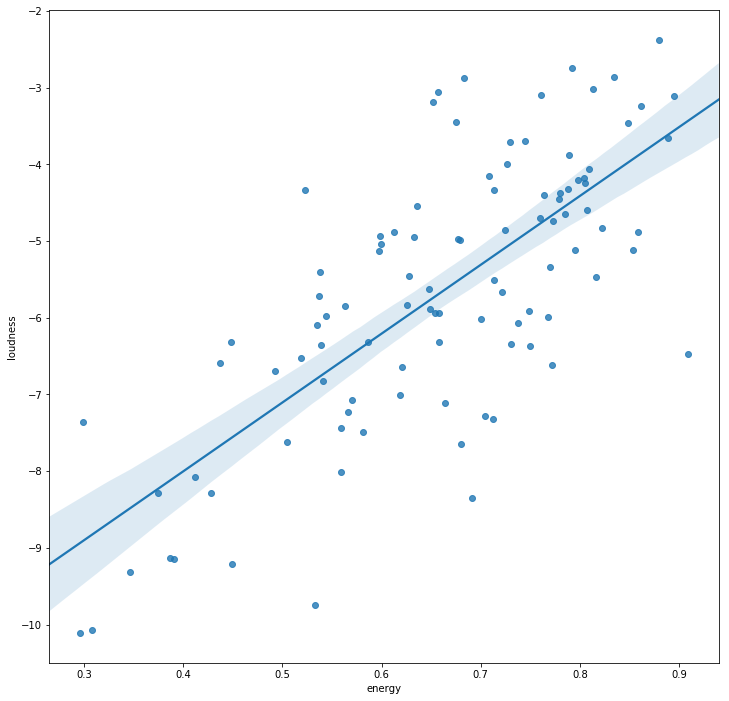

In [ ]:
plt.figure(figsize=(12,12))
sns.regplot(x="energy", y="loudness", data=df)

##This proves there is a positive correlation between loudness and energy. As energy increases, loudness increases. This makes sense because energy is calculated using loudness as a condition, not sure if that condition is the column value.

##6. Descriptive Statistics

In [ ]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00
mean,0.71646,0.659060,5.330000,-5.677640,0.590000,0.115569,0.195701,0.001584,0.158302,0.484443,119.904180,205206.780000,3.98
std,0.13107,0.145067,3.676447,1.777577,0.494311,0.104527,0.220946,0.013449,0.111662,0.206145,28.795984,40007.893404,0.20
min,0.25800,0.296000,0.000000,-10.109000,0.000000,0.023200,0.000282,0.000000,0.021500,0.079600,64.934000,95467.000000,3.00
25%,0.63550,0.562000,1.750000,-6.650500,0.000000,0.045350,0.040225,0.000000,0.094675,0.341000,95.730750,184680.000000,4.00
50%,0.73300,0.678000,5.000000,-5.566500,1.000000,0.074950,0.109000,0.000000,0.118500,0.470500,120.116000,205047.500000,4.00
75%,0.79825,0.772250,8.250000,-4.363750,1.000000,0.137000,0.247750,0.000031,0.170750,0.641500,140.022750,221493.250000,4.00
max,0.96400,0.909000,11.000000,-2.384000,1.000000,0.530000,0.934000,0.134000,0.636000,0.931000,198.075000,417920.000000,5.00


##Danceability and Energy have means above 0.50. This prove majority of the tracks have high danceability and energy. However, the standard deviation is small, indicating the spread of data is small. 

##7. Danceability

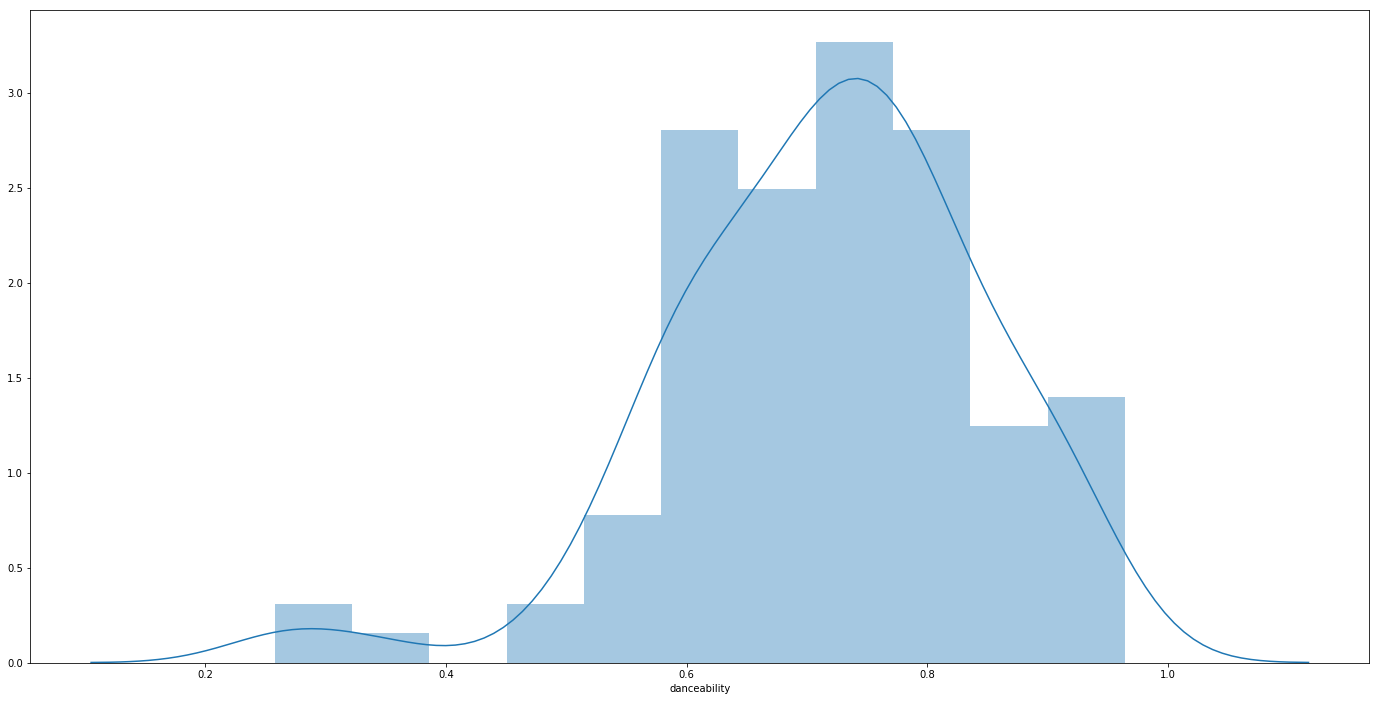

In [ ]:
plt.figure(figsize=(24,12))
sns.distplot(df['danceability'])

## Most songs lean toward the average of 0.7 in danceability, which shows listeners stream more danceable songs.

In [ ]:
very=df['danceability']>=0.70
regular=(df['danceability']>=0.5) & (df['danceability']<0.70)
poor=df['danceability']<0.5
data=[very.sum(),regular.sum(),poor.sum()]
danceability=pd.DataFrame(data,columns=['Count'],
                   index=['Very','Regular','Poor'])
danceability

,Count
Very,57
Regular,39
Poor,4


In [ ]:
danceable_df = df[['name','artists','danceability', 'energy','loudness','valence','loudness', 'tempo']].sort_values(by='danceability',ascending=False)
danceable_df.head(10)

,name,artists,danceability,energy,loudness,valence,loudness,tempo
91,Yes Indeed,Lil Baby,0.964,0.346,-9.309,0.562,-9.309,119.958
55,FEFE (feat. Nicki Minaj & Murda Beatz),6ix9ine,0.931,0.387,-9.127,0.376,-9.127,125.978
19,Look Alive (feat. Drake),BlocBoy JB,0.922,0.581,-7.495,0.595,-7.495,140.022
18,Moonlight,XXXTENTACION,0.921,0.537,-5.723,0.711,-5.723,128.009
61,Nonstop,Drake,0.912,0.412,-8.074,0.422,-8.074,154.983
89,Bella,Wolfine,0.909,0.493,-6.688,0.844,-6.688,94.016
73,Walk It Talk It,Migos,0.909,0.628,-5.456,0.406,-5.456,145.905
82,HUMBLE.,Kendrick Lamar,0.908,0.621,-6.638,0.421,-6.638,150.011
21,Te Bot? - Remix,Nio Garcia,0.903,0.675,-3.445,0.442,-3.445,96.507
30,Taste (feat. Offset),Tyga,0.884,0.559,-7.442,0.342,-7.442,97.994


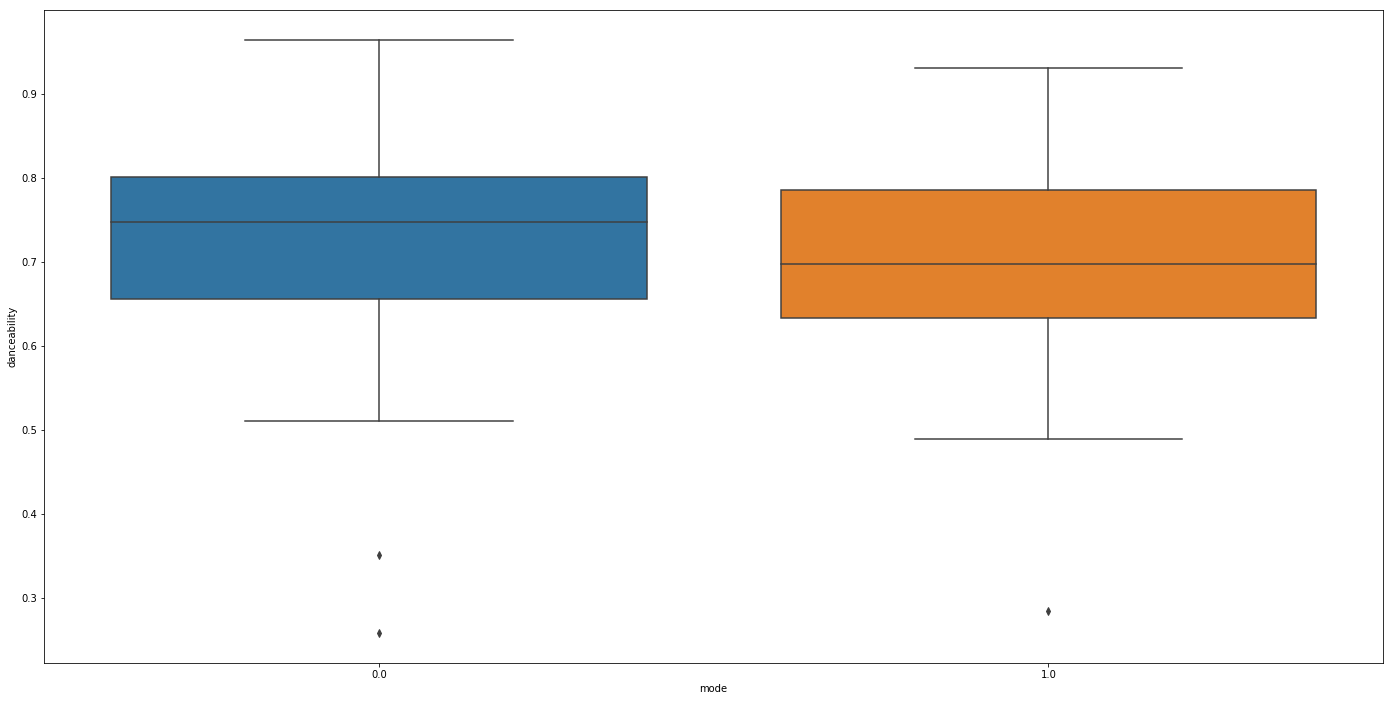

In [ ]:
plt.figure(figsize=(24,12))
sns.boxplot(y="danceability", x="mode", data=df)

##More minor scale songs are danceable than major scale songs.

##Even with a high danceability, it does not mean high energy.

##8. Energy

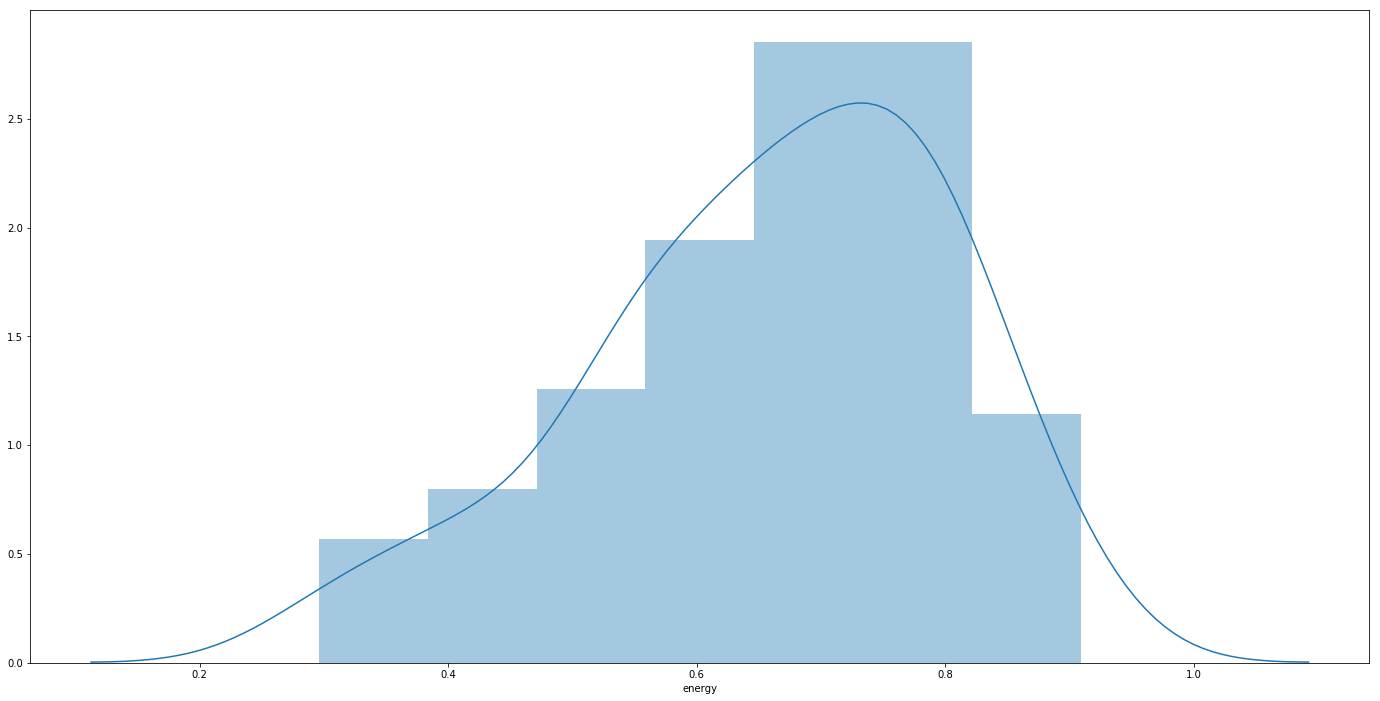

In [ ]:
plt.figure(figsize=(24,12))
sns.distplot(df['energy'])

##Most tracks are around 0.65, most listeners enjoy highly energetic tracks.

In [ ]:
every=df['energy']>=0.65
eregular=(df['energy']>=0.45) & (df['energy']<0.65)
epoor=df['energy']<0.45
data=[every.sum(),eregular.sum(),epoor.sum()]
energy=pd.DataFrame(data,columns=['Count'],
                   index=['High','Medium','Low'])
energy

,Count
High,58
Medium,30
Low,12


## Most songs lean toward the average of 0.7 in energy, which shows listeners stream more energetic songs.

In [ ]:
energy_df = df[['name','artists','danceability', 'energy', 'loudness','valence','tempo']].sort_values(by='energy',ascending=False).head(10)
energy_df

,name,artists,danceability,energy,loudness,valence,tempo
12,Nice For What,Drake,0.586,0.909,-6.474,0.757,93.394
77,"1, 2, 3 (feat. Jason Derulo & De La Ghetto)",Sofia Reyes,0.792,0.895,-3.112,0.794,94.968
34,?chame La Culpa,Luis Fonsi,0.726,0.889,-3.655,0.649,96.024
9,FRIENDS,Marshmello,0.626,0.880,-2.384,0.534,95.079
7,One Kiss (with Dua Lipa),Calvin Harris,0.791,0.862,-3.240,0.592,123.994
46,Finesse (Remix) [feat. Cardi B],Bruno Mars,0.704,0.859,-4.877,0.926,105.115
23,Youngblood,5 Seconds of Summer,0.596,0.854,-5.114,0.152,120.274
41,Dura,Daddy Yankee,0.791,0.848,-3.456,0.828,95.000
45,Jackie Chan,Ti?sto,0.747,0.834,-2.867,0.687,128.005
43,Thunder,Imagine Dragons,0.605,0.822,-4.833,0.288,167.997


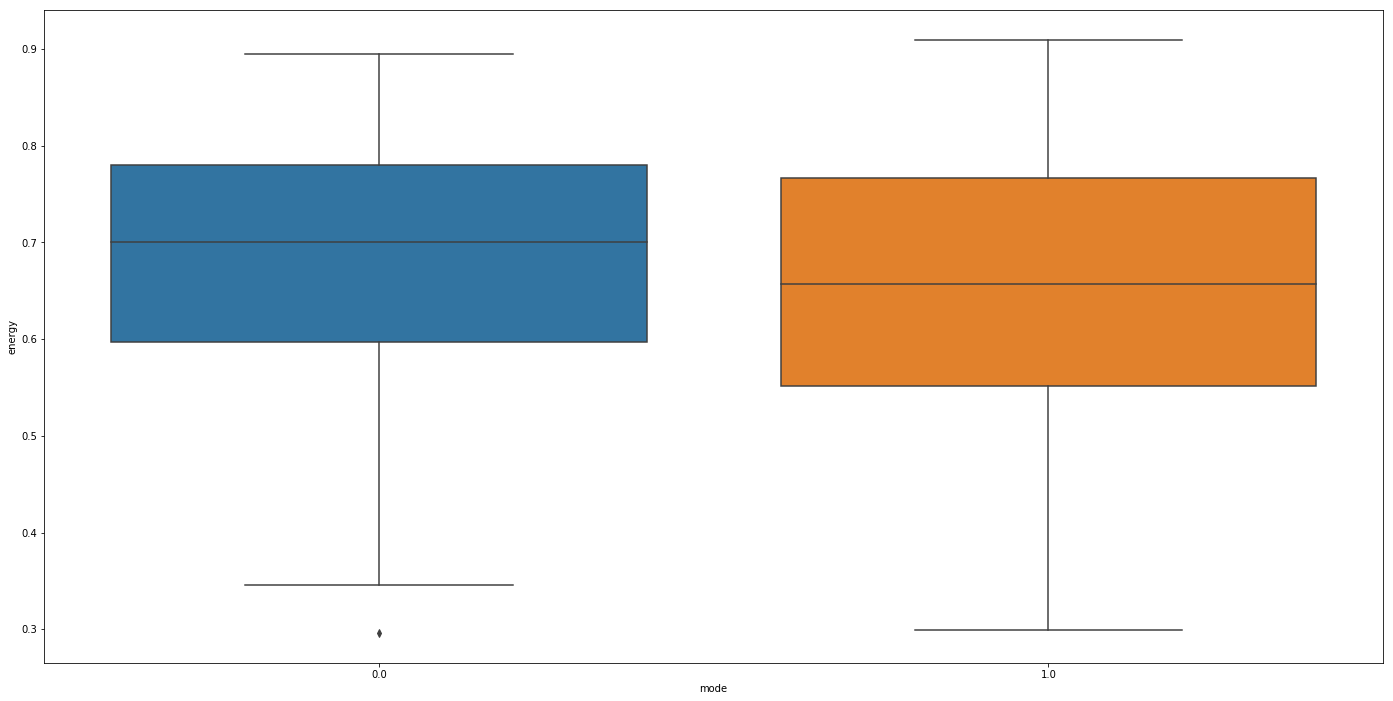

In [ ]:
plt.figure(figsize=(24,12))
sns.boxplot(y="energy", x="mode", data=df)

##More minor scale songs are energetic than major scale songs.

##Just like the forementioned conclusion about danceability, high energy does not mean high danceability

In [ ]:
danceenergy_df = df[(df.danceability >= 0.75) & (df.energy >= 0.65)]
danceenergy_df

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
6,58q2HKrzhC3ozto2nDdN4,I Like It,Cardi B,0.816,0.726,5.0,-3.998,0.0,0.1290,0.09900,0.000000,0.3720,0.650,136.048,253390.0,4.0
7,7ef4DlsgrMEH11cDZd32M,One Kiss (with Dua Lipa),Calvin Harris,0.791,0.862,9.0,-3.240,0.0,0.1100,0.03700,0.000022,0.0814,0.592,123.994,214847.0,4.0
14,09IStsImFySgyp0pIQdqA,The Middle,Zedd,0.753,0.657,7.0,-3.061,1.0,0.0449,0.17100,0.000000,0.1120,0.437,107.010,184732.0,4.0
21,3V8UKqhEK5zBkBb6d6ub8,Te Bot? - Remix,Nio Garcia,0.903,0.675,11.0,-3.445,0.0,0.2140,0.54200,0.000013,0.0595,0.442,96.507,417920.0,4.0
24,2xJCMIJfcNYDc5iR0sAm2,New Rules,Dua Lipa,0.762,0.700,9.0,-6.021,0.0,0.0694,0.00261,0.000016,0.1530,0.608,116.073,209320.0,4.0
25,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,233713.0,4.0
41,6KuqAtoeVzxAYOaMveLNp,Dura,Daddy Yankee,0.791,0.848,1.0,-3.456,1.0,0.0506,0.18300,0.000000,0.4090,0.828,95.000,200480.0,4.0
42,2xLMifQCjDGFmkHkpNLD9,SICKO MODE,Travis Scott,0.834,0.730,8.0,-3.714,1.0,0.2220,0.00513,0.000000,0.1240,0.446,155.008,312820.0,4.0
44,6jA8JUuPCGYjFcgw0AoM5,Me Niego,Reik,0.777,0.779,0.0,-4.449,0.0,0.0972,0.05430,0.000000,0.6360,0.768,94.023,221653.0,4.0
54,0pqnGHJpmpxLKifKRmU6W,Believer,Imagine Dragons,0.776,0.780,10.0,-4.374,0.0,0.1280,0.06220,0.000000,0.0810,0.666,124.949,204347.0,4.0


In [ ]:
danceenergy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 6 to 90
Data columns (total 16 columns):
id                  21 non-null object
name                21 non-null object
artists             21 non-null object
danceability        21 non-null float64
energy              21 non-null float64
key                 21 non-null float64
loudness            21 non-null float64
mode                21 non-null float64
speechiness         21 non-null float64
acousticness        21 non-null float64
instrumentalness    21 non-null float64
liveness            21 non-null float64
valence             21 non-null float64
tempo               21 non-null float64
duration_ms         21 non-null float64
time_signature      21 non-null float64
dtypes: float64(13), object(3)
memory usage: 2.8+ KB


##9. Valence

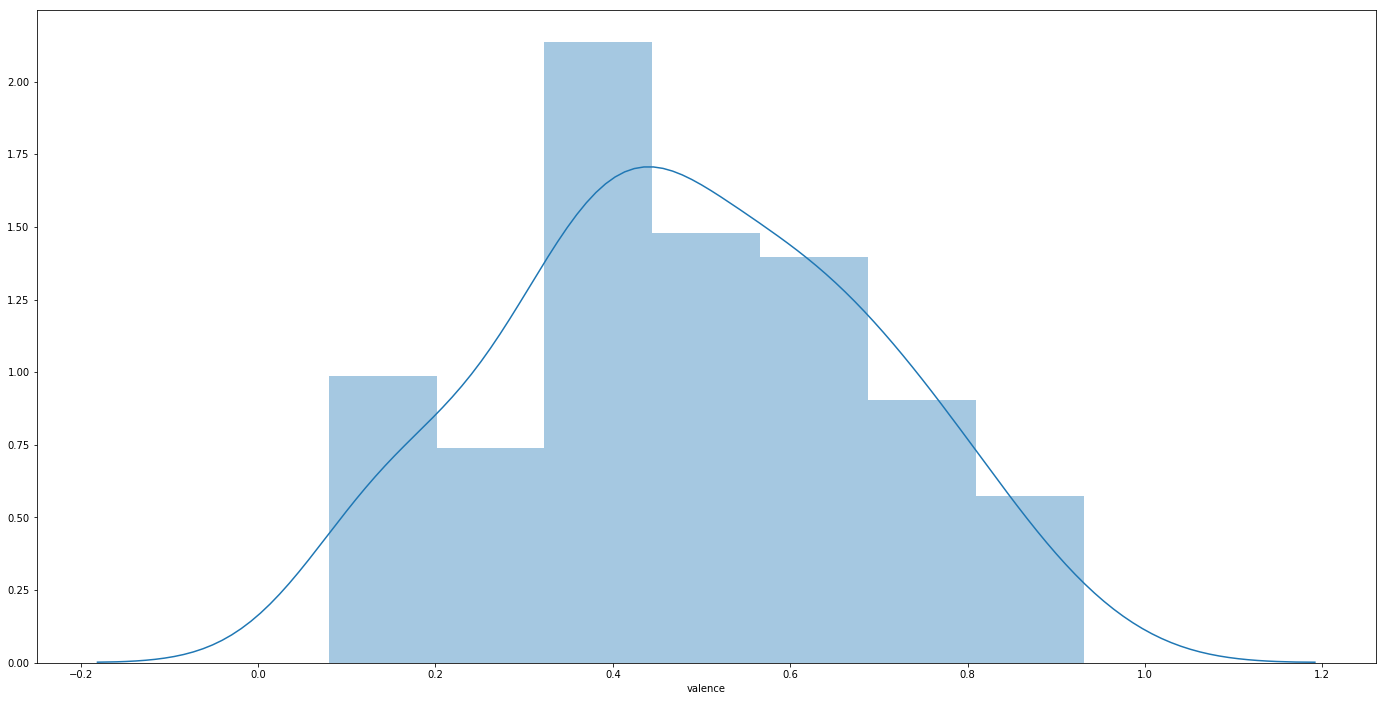

In [ ]:
plt.figure(figsize=(24,12))
sns.distplot(df['valence'])

## Most songs lean toward the average of 0.45 in valence, which shows listeners stream songs with more neutral or both positive and negative emotions.

In [ ]:
valence_df = df[['name','artists','danceability', 'energy','loudness','valence','tempo']].sort_values(by='valence',ascending=False).head(10)
valence_df

,name,artists,danceability,energy,loudness,valence,tempo
25,Shape of You,Ed Sheeran,0.825,0.652,-3.183,0.931,95.977
46,Finesse (Remix) [feat. Cardi B],Bruno Mars,0.704,0.859,-4.877,0.926,105.115
89,Bella,Wolfine,0.909,0.493,-6.688,0.844,94.016
66,D?jala que vuelva (feat. Manuel Turizo),Piso 21,0.681,0.788,-4.323,0.839,170.019
78,Criminal,Natti Natasha,0.814,0.813,-3.023,0.839,79.997
41,Dura,Daddy Yankee,0.791,0.848,-3.456,0.828,95.000
59,Sin Pijama,Becky G,0.791,0.745,-3.695,0.820,94.014
77,"1, 2, 3 (feat. Jason Derulo & De La Ghetto)",Sofia Reyes,0.792,0.895,-3.112,0.794,94.968
44,Me Niego,Reik,0.777,0.779,-4.449,0.768,94.023
12,Nice For What,Drake,0.586,0.909,-6.474,0.757,93.394


In [ ]:
vpositive=df['valence']>=0.65
vneutral=(df['valence']>=0.35) & (df['valence']<0.65)
vnegative=df['valence']<0.35
data=[vpositive.sum(),vneutral.sum(),vnegative.sum()]
valence=pd.DataFrame(data,columns=['Count'],
                   index=['Positive','Neutral','Negative'])
valence

,Count
Positive,24
Neutral,50
Negative,26


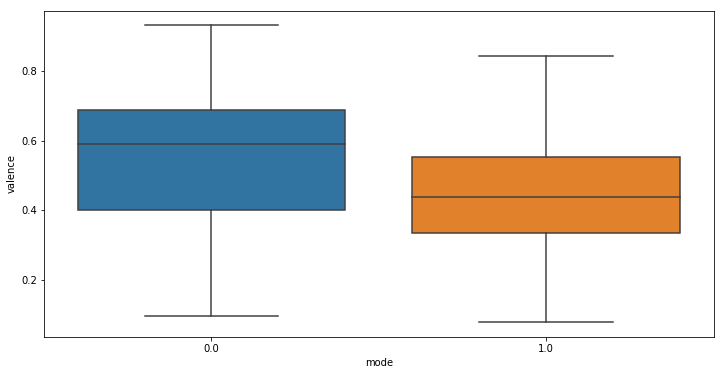

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(y="valence", x="mode", data=df)

In [ ]:
df_positive = df.loc[df['mode']== 1]
df_positive[['valence']].describe()

,valence
count,59.000000
mean,0.448434
std,0.188127
min,0.079600
25%,0.335500
50%,0.439000
75%,0.553500
max,0.844000


In [ ]:
df_negative = df.loc[df['mode']== 0]
df_negative[['valence']].describe()

,valence
count,41.000000
mean,0.536261
std,0.221798
min,0.096700
25%,0.401000
50%,0.591000
75%,0.689000
max,0.931000


##The minor key songs have a higher valence than the major keys. This is interesting because minor scales have a sad meloedy while major scales have a happy melody. These finding are completely opposite of the valence defintion. The valence is still neutral. It all boils down to the context of the song and the composition of it, certain chords and scales deliever a particular emotional response when played a certain way.

In [ ]:
pmode_df = df[(df['mode'] == 1.0) & (df.valence >= 0.75)]
pmode_df

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
12,3CA9pLiwRIGtUBiMjbZmR,Nice For What,Drake,0.586,0.909,8.0,-6.474,1.0,0.0705,0.0891,0.000109,0.1190,0.757,93.394,210747.0,4.0
41,6KuqAtoeVzxAYOaMveLNp,Dura,Daddy Yankee,0.791,0.848,1.0,-3.456,1.0,0.0506,0.1830,0.000000,0.4090,0.828,95.000,200480.0,4.0
53,10Igtw8bSDyyFs7KIsKng,Freaky Friday (feat. Chris Brown),Lil Dicky,0.755,0.599,8.0,-5.042,1.0,0.2240,0.1470,0.000000,0.1090,0.755,133.123,216632.0,4.0
66,1j6xOGusnyXq3l6IryKF3,D?jala que vuelva (feat. Manuel Turizo),Piso 21,0.681,0.788,1.0,-4.323,1.0,0.0785,0.0482,0.000000,0.0753,0.839,170.019,220117.0,4.0
89,3xcCix7Jv1Rp90YVmgo35,Bella,Wolfine,0.909,0.493,3.0,-6.688,1.0,0.0735,0.1280,0.000147,0.1270,0.844,94.016,197120.0,4.0


In [ ]:
positiveenergy_df = df[(df.valence >= 0.75) & (df.energy >= 0.65)]
positiveenergy_df

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
12,3CA9pLiwRIGtUBiMjbZmR,Nice For What,Drake,0.586,0.909,8.0,-6.474,1.0,0.0705,0.0891,0.000109,0.1190,0.757,93.394,210747.0,4.0
25,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
41,6KuqAtoeVzxAYOaMveLNp,Dura,Daddy Yankee,0.791,0.848,1.0,-3.456,1.0,0.0506,0.1830,0.000000,0.4090,0.828,95.000,200480.0,4.0
44,6jA8JUuPCGYjFcgw0AoM5,Me Niego,Reik,0.777,0.779,0.0,-4.449,0.0,0.0972,0.0543,0.000000,0.6360,0.768,94.023,221653.0,4.0
46,3Vo4wInECJQuz9BIBMOu8,Finesse (Remix) [feat. Cardi B],Bruno Mars,0.704,0.859,5.0,-4.877,0.0,0.0996,0.0185,0.000000,0.0215,0.926,105.115,217289.0,4.0
59,2ijef6ni2amuunRoKTlgw,Sin Pijama,Becky G,0.791,0.745,11.0,-3.695,0.0,0.0464,0.3540,0.000029,0.1040,0.820,94.014,188560.0,4.0
66,1j6xOGusnyXq3l6IryKF3,D?jala que vuelva (feat. Manuel Turizo),Piso 21,0.681,0.788,1.0,-4.323,1.0,0.0785,0.0482,0.000000,0.0753,0.839,170.019,220117.0,4.0
71,6QgjcU0zLnzq5OrUoSZ3O,Feel It Still,Portugal. The Man,0.801,0.795,1.0,-5.115,0.0,0.0504,0.0417,0.000113,0.0717,0.754,79.028,163253.0,4.0
77,4QtiVmuA88tPQiCOHZuQ5,"1, 2, 3 (feat. Jason Derulo & De La Ghetto)",Sofia Reyes,0.792,0.895,1.0,-3.112,0.0,0.0589,0.1650,0.000000,0.0501,0.794,94.968,201526.0,4.0
78,6Za3190Sbw39BBC77WSS1,Criminal,Natti Natasha,0.814,0.813,2.0,-3.023,0.0,0.0561,0.0300,0.000093,0.2550,0.839,79.997,232550.0,4.0


##10. Loudness

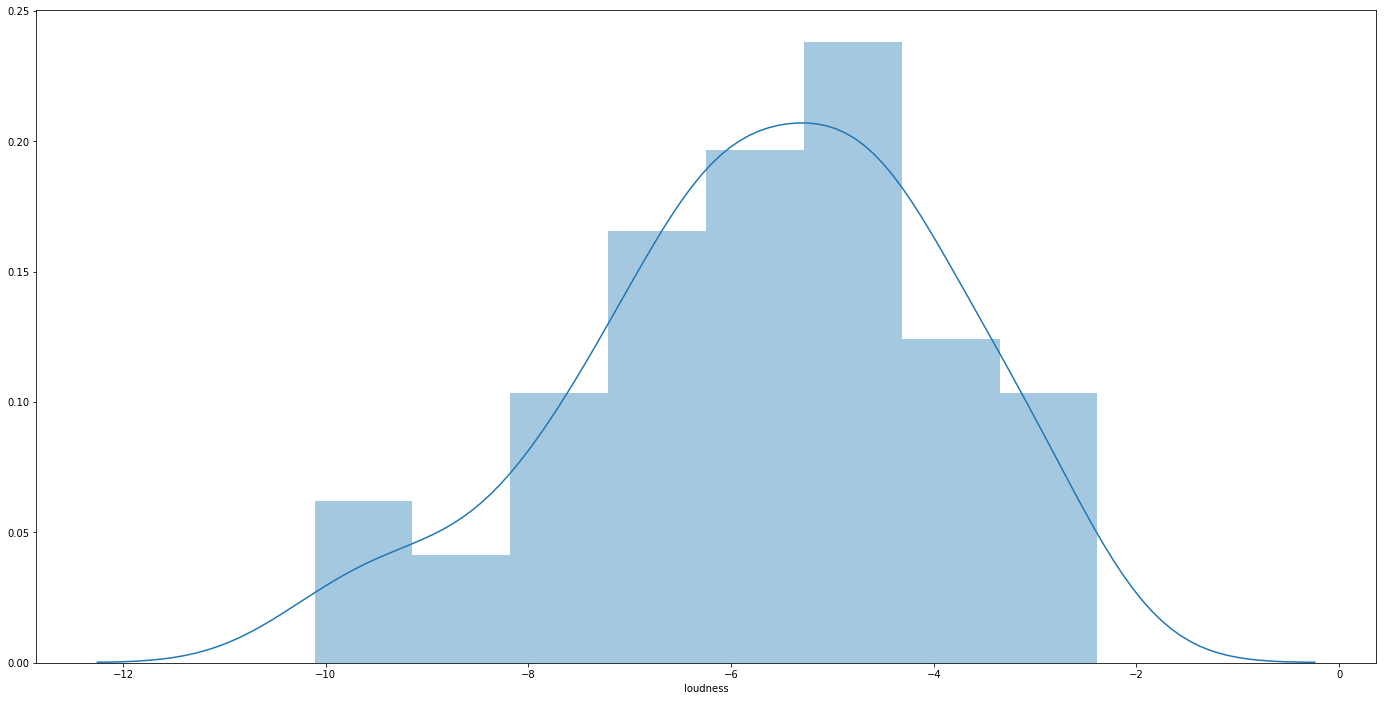

In [ ]:
plt.figure(figsize=(24,12))
sns.distplot(df['loudness'])

In [ ]:
loud=df['loudness']>=-5
medium=(df['loudness']>=-8) & (df['loudness']<-5)
soft=df['loudness']<-8
data=[loud.sum(),medium.sum(),soft.sum()]
loudness=pd.DataFrame(data,columns=['Count'],
                   index=['Loud','Medium','Soft'])
loudness

,Count
Loud,41
Medium,47
Soft,12


##61% of  the tracks are considered loud. It makes sense if a track is considered loud, especially if it has high energy or danceable.

In [ ]:
loudness_df = df[['name','artists','danceability', 'energy','loudness','valence','tempo']].sort_values(by='loudness',ascending=True).head(10)
loudness_df

,name,artists,danceability,energy,loudness,valence,tempo
80,lovely (with Khalid),Billie Eilish,0.351,0.296,-10.109,0.1200,115.284
38,changes,XXXTENTACION,0.669,0.308,-10.068,0.5200,64.934
62,Fuck Love (feat. Trippie Redd),XXXTENTACION,0.797,0.533,-9.740,0.3290,131.036
91,Yes Indeed,Lil Baby,0.964,0.346,-9.309,0.5620,119.958
0,God's Plan,Drake,0.754,0.449,-9.211,0.3570,77.169
28,Jocelyn Flores,XXXTENTACION,0.872,0.391,-9.144,0.4370,134.021
55,FEFE (feat. Nicki Minaj & Murda Beatz),6ix9ine,0.931,0.387,-9.127,0.3760,125.978
33,Nevermind,Dennis Lloyd,0.592,0.691,-8.354,0.0796,99.976
50,Ric Flair Drip (& Metro Boomin),Offset,0.880,0.428,-8.280,0.3330,100.007
52,Too Good At Goodbyes,Sam Smith,0.698,0.375,-8.279,0.5340,91.920


In [ ]:
loudenergy_df = df[(df.loudness >= -5.0) & (df.energy >= 0.65)]
loudenergy_df

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
6,58q2HKrzhC3ozto2nDdN4,I Like It,Cardi B,0.816,0.726,5.0,-3.998,0.0,0.1290,0.09900,0.000000,0.3720,0.650,136.048,253390.0,4.0
7,7ef4DlsgrMEH11cDZd32M,One Kiss (with Dua Lipa),Calvin Harris,0.791,0.862,9.0,-3.240,0.0,0.1100,0.03700,0.000022,0.0814,0.592,123.994,214847.0,4.0
9,08bNPGLD8AhKpnnERrAc6,FRIENDS,Marshmello,0.626,0.880,9.0,-2.384,0.0,0.0504,0.20500,0.000000,0.1280,0.534,95.079,202621.0,4.0
14,09IStsImFySgyp0pIQdqA,The Middle,Zedd,0.753,0.657,7.0,-3.061,1.0,0.0449,0.17100,0.000000,0.1120,0.437,107.010,184732.0,4.0
17,39N9RPD9MRb5WmoLzNzPe,X,Nicky Jam,0.595,0.773,9.0,-4.736,0.0,0.0549,0.03640,0.001080,0.3340,0.711,180.073,173628.0,4.0
20,5CLGzJsGqhCEECcpnFQA8,"These Days (feat. Jess Glynne, Macklemore & Da...",Rudimental,0.653,0.809,0.0,-4.057,1.0,0.0474,0.19400,0.000000,0.1650,0.550,92.213,210773.0,4.0
21,3V8UKqhEK5zBkBb6d6ub8,Te Bot? - Remix,Nio Garcia,0.903,0.675,11.0,-3.445,0.0,0.2140,0.54200,0.000013,0.0595,0.442,96.507,417920.0,4.0
22,7uzmGiiJyRfuViKKK3lVm,Mine,Bazzi,0.710,0.789,4.0,-3.874,1.0,0.0722,0.01610,0.000003,0.4510,0.717,142.929,131064.0,4.0
25,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,233713.0,4.0
34,2hl6q70unbviGo3g1R7uF,?chame La Culpa,Luis Fonsi,0.726,0.889,0.0,-3.655,1.0,0.0429,0.03280,0.000000,0.0925,0.649,96.024,173720.0,4.0


In [ ]:
loudenergy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 6 to 97
Data columns (total 16 columns):
id                  36 non-null object
name                36 non-null object
artists             36 non-null object
danceability        36 non-null float64
energy              36 non-null float64
key                 36 non-null float64
loudness            36 non-null float64
mode                36 non-null float64
speechiness         36 non-null float64
acousticness        36 non-null float64
instrumentalness    36 non-null float64
liveness            36 non-null float64
valence             36 non-null float64
tempo               36 non-null float64
duration_ms         36 non-null float64
time_signature      36 non-null float64
dtypes: float64(13), object(3)
memory usage: 4.8+ KB


##11. Conclusion from Exploratory Analysis

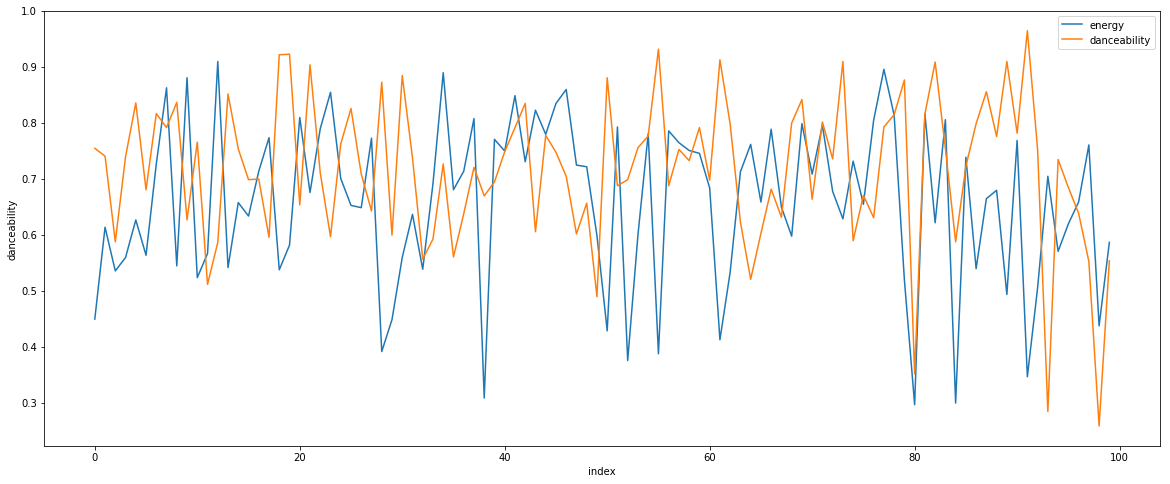

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data = df.reset_index(), x = 'index', y = 'energy', label="energy")
sns.lineplot(data = df.reset_index(), x = 'index', y = 'danceability', label="danceability")


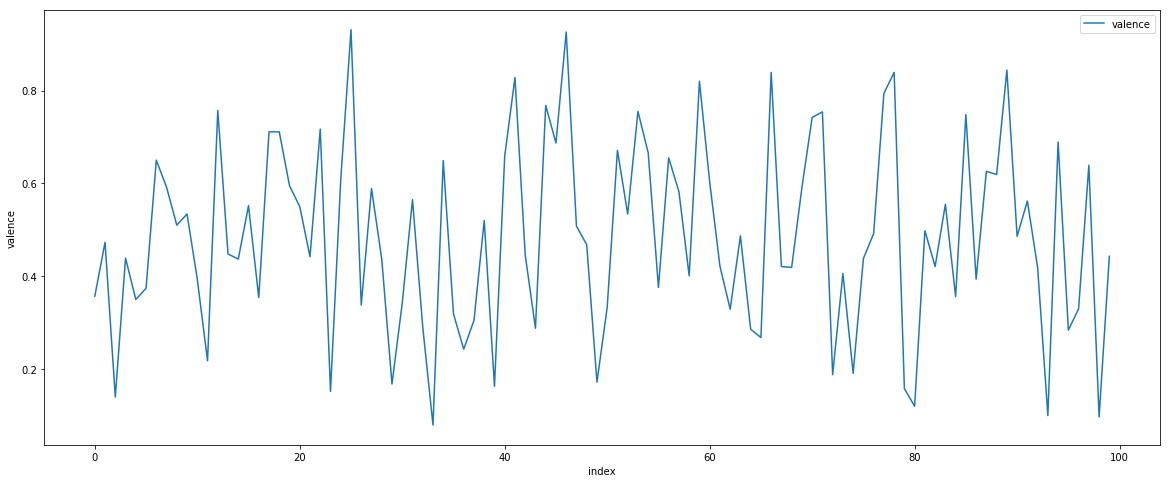

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data = df.reset_index(), x = 'index', y = 'valence', label="valence")

##While this data shows the values of those features by index. It is interesting to see that usually energy and danceability are on opposite sides of the spectrum. One is high and the other is low, while this may not constitute a pattern, it is proof of the diverse features of popular music and listening habits.

##Based upon my findings in most streamed songs of 2018. 


1.   Listeners enjoy songs that were either high in energy or high in danceability. Not both.
2.   Songs that were considered loud had high energy.
3.   The spread of data was pretty small, each song had it's own unqiue audio features.
4.   The valence of tracks was considered either neutral, the emotion was not quite positive or negative.
5.   Listeners streamed more major scale songs, however there were more danceable and energetic songs in the minor scale.



##12. Analysis of Artists With Most Songs

In [ ]:
df_group = df.assign(freq=df.groupby('artists')['artists'].transform('count'))\
  .sort_values(by=['freq','artists'],ascending=[False,True])
df_group.reset_index()

,index,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,freq
0,2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.11700,0.000066,0.1310,0.1400,159.847,218147.0,4.0,6
1,3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.58000,0.000000,0.1120,0.4390,140.124,221440.0,4.0,6
2,5,7dt6x5M1jzdTEt8oCbisT,Better Now,Post Malone,0.680,0.563,10.0,-5.843,1.0,0.0454,0.35400,0.000000,0.1360,0.3740,145.028,231267.0,4.0,6
3,32,75ZvA4QfFiZvzhj2xkaWA,I Fall Apart,Post Malone,0.556,0.538,8.0,-5.408,0.0,0.0382,0.06890,0.000000,0.1960,0.2910,143.950,223347.0,4.0,6
4,75,32lItqlMi4LBhb4k0BaSa,Candy Paint,Post Malone,0.670,0.654,4.0,-5.944,1.0,0.1530,0.62700,0.000001,0.0710,0.4380,180.024,227533.0,4.0,6
5,76,3a1lNhkSLSkpJE4MSHpDu,Congratulations,Post Malone,0.630,0.804,6.0,-4.183,1.0,0.0363,0.21500,0.000000,0.2530,0.4920,123.146,220293.0,4.0,6
6,1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.25800,0.003720,0.1230,0.4730,75.023,166606.0,4.0,6
7,18,0JP9xo3adEtGSdUEISisz,Moonlight,XXXTENTACION,0.921,0.537,9.0,-5.723,0.0,0.0804,0.55600,0.004040,0.1020,0.7110,128.009,135090.0,4.0,6
8,28,7m9OqQk4RVRkw9JJdeAw9,Jocelyn Flores,XXXTENTACION,0.872,0.391,0.0,-9.144,0.0,0.2420,0.46900,0.000004,0.2970,0.4370,134.021,119133.0,4.0,6
9,38,7AFASza1mXqntmGtbxXpr,changes,XXXTENTACION,0.669,0.308,11.0,-10.068,1.0,0.0290,0.88300,0.000000,0.0984,0.5200,64.934,121887.0,4.0,6


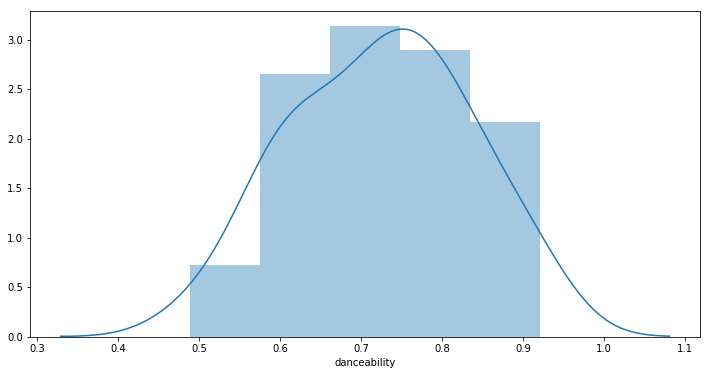

In [ ]:
df_artists = df_group.head(48)
plt.figure(figsize=(12,6))
sns.distplot(df_artists['danceability'])

##Danceability is pretty high among top artists.

##Top Artist Post Malone Analysis

In [ ]:
pm_df = df.loc[df['artists'] == 'Post Malone']
pm_df

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
5,7dt6x5M1jzdTEt8oCbisT,Better Now,Post Malone,0.680,0.563,10.0,-5.843,1.0,0.0454,0.3540,0.000000,0.136,0.374,145.028,231267.0,4.0
32,75ZvA4QfFiZvzhj2xkaWA,I Fall Apart,Post Malone,0.556,0.538,8.0,-5.408,0.0,0.0382,0.0689,0.000000,0.196,0.291,143.950,223347.0,4.0
75,32lItqlMi4LBhb4k0BaSa,Candy Paint,Post Malone,0.670,0.654,4.0,-5.944,1.0,0.1530,0.6270,0.000001,0.071,0.438,180.024,227533.0,4.0
76,3a1lNhkSLSkpJE4MSHpDu,Congratulations,Post Malone,0.630,0.804,6.0,-4.183,1.0,0.0363,0.2150,0.000000,0.253,0.492,123.146,220293.0,4.0


In [ ]:
pm_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000e+00,6.000000,6.000000,6.000000,6.000000,6.0
mean,0.643667,0.608833,6.833333,-5.913167,0.666667,0.079950,0.326983,1.110333e-05,0.149833,0.362333,148.686500,223671.166667,4.0
std,0.066611,0.105055,2.228602,1.239897,0.516398,0.048266,0.235796,2.670092e-05,0.064756,0.128898,19.328985,4891.258669,0.0
min,0.556000,0.535000,4.000000,-8.011000,0.000000,0.036300,0.068900,0.000000e+00,0.071000,0.140000,123.146000,218147.000000,4.0
25%,0.597750,0.543250,5.250000,-6.053500,0.250000,0.040000,0.141500,0.000000e+00,0.116750,0.311750,141.080500,220579.750000,4.0
50%,0.650000,0.561000,7.000000,-5.893500,1.000000,0.067600,0.284500,0.000000e+00,0.133500,0.406000,144.489000,222393.500000,4.0
75%,0.677500,0.631250,8.000000,-5.516750,1.000000,0.110200,0.523500,7.650000e-07,0.181000,0.438750,156.142250,226486.500000,4.0
max,0.739000,0.804000,10.000000,-4.183000,1.000000,0.153000,0.627000,6.560000e-05,0.253000,0.492000,180.024000,231267.000000,4.0


##Post Malone had the most songs streamed in 2018 and yet his audio features do not show a lot of strength in the areas of danceability, energy, and valence compared with the orginal means.

##Top Artists XXXTENTACION Analysis

In [ ]:
xxx_df= df.loc[df['artists'] == 'XXXTENTACION']
xxx_df

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.1230,0.473,75.023,166606.0,4.0
18,0JP9xo3adEtGSdUEISisz,Moonlight,XXXTENTACION,0.921,0.537,9.0,-5.723,0.0,0.0804,0.5560,0.004040,0.1020,0.711,128.009,135090.0,4.0
28,7m9OqQk4RVRkw9JJdeAw9,Jocelyn Flores,XXXTENTACION,0.872,0.391,0.0,-9.144,0.0,0.2420,0.4690,0.000004,0.2970,0.437,134.021,119133.0,4.0
38,7AFASza1mXqntmGtbxXpr,changes,XXXTENTACION,0.669,0.308,11.0,-10.068,1.0,0.0290,0.8830,0.000000,0.0984,0.520,64.934,121887.0,4.0
62,7AQim7LbvFVZJE3O8TYgf,Fuck Love (feat. Trippie Redd),XXXTENTACION,0.797,0.533,0.0,-9.740,0.0,0.0412,0.0172,0.000152,0.1030,0.329,131.036,146520.0,4.0
94,3GVkPk8mqxz0itaAriG1L,Everybody Dies In Their Nightmares,XXXTENTACION,0.734,0.570,7.0,-7.066,0.0,0.1330,0.8470,0.000021,0.1120,0.689,129.953,95467.0,4.0


In [ ]:
xxx_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.0
mean,0.788833,0.492000,5.833333,-7.770167,0.333333,0.111767,0.505033,0.001323,0.139233,0.526500,110.496000,130783.833333,4.0
std,0.094024,0.117037,4.708149,2.194881,0.516398,0.079158,0.335471,0.001984,0.077797,0.148572,31.606413,24542.094103,0.0
min,0.669000,0.308000,0.000000,-10.068000,0.000000,0.029000,0.017200,0.000000,0.098400,0.329000,64.934000,95467.000000,4.0
25%,0.735500,0.426500,1.750000,-9.591000,0.000000,0.051000,0.310750,0.000008,0.102250,0.446000,88.269500,119821.500000,4.0
50%,0.768500,0.535000,7.500000,-8.105000,0.000000,0.106700,0.512500,0.000087,0.107500,0.496500,128.981000,128488.500000,4.0
75%,0.853250,0.561750,8.750000,-6.058750,0.750000,0.142000,0.774250,0.002828,0.120250,0.646750,130.765250,143662.500000,4.0
max,0.921000,0.613000,11.000000,-4.880000,1.000000,0.242000,0.883000,0.004040,0.297000,0.711000,134.021000,166606.000000,4.0


##XXXTENTACION also had the most songs streamed in 2018 and yet his audio features do show some strength in the areas of danceability and valence compared with the orginal means.

##13. My Playlist Analysis

In [ ]:
my_spotify_df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/myspotify_df.csv')
my_spotify_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
Unnamed: 0          50 non-null int64
id                  50 non-null object
name                50 non-null object
artists             50 non-null object
danceability        50 non-null float64
energy              50 non-null float64
key                 50 non-null int64
loudness            50 non-null float64
mode                50 non-null int64
speechiness         50 non-null float64
acousticness        50 non-null float64
instrumentalness    50 non-null float64
liveness            50 non-null float64
valence             50 non-null float64
tempo               50 non-null float64
duration_ms         50 non-null int64
time_signature      50 non-null int64
dtypes: float64(9), int64(5), object(3)
memory usage: 6.7+ KB


In [ ]:
my_spotify_df = my_spotify_df.drop(columns=['Unnamed: 0'])
my_spotify_df

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0qnOjNW04qpcgXqD9dwru2,Killer Whales,Smallpools,0.416,0.849,8,-3.833,1,0.0503,0.000303,0.000042,0.1850,0.677,144.844,222760,4
1,1pHP4JeQV9wDx87D6qH9hD,Here It Goes Again,Ok Go,0.537,0.882,0,-2.306,1,0.0403,0.000342,0.000091,0.1200,0.810,145.729,179813,4
2,1JQr89uc6xVkIwfS09ct8K,Good Feeling,311,0.687,0.898,4,-3.926,0,0.0464,0.001270,0.000444,0.0743,0.436,100.014,203913,4
3,0wJYRiAdoyP3yMqLpsTaK8,Monument,Mutemath,0.567,0.892,1,-4.660,1,0.0328,0.022600,0.000000,0.2890,0.658,138.979,213827,4
4,4JBI2OQO2b0zs27cKODiu5,Avalanche,WALK THE MOON,0.594,0.858,9,-4.339,1,0.0387,0.000590,0.000003,0.0642,0.663,138.021,218720,4
5,3TgMcrV32NUKjEG2ujn9eh,It's Not Living(If It's Not With You),The 1975,0.618,0.824,1,-5.316,1,0.0301,0.000297,0.000069,0.0649,0.598,121.238,248336,4
6,7Ijr2MeaWwyqXp48bSu1Cl,Denise,Fountains of Wayne,0.537,0.810,1,-4.863,1,0.0450,0.000789,0.000773,0.0613,0.633,138.014,153667,4
7,1qwnPVOIJjAFfCc40Etb1D,Homegrown,Zac Brown Band,0.717,0.796,6,-3.677,1,0.0303,0.018900,0.000089,0.1900,0.942,105.017,205000,4
8,2yfu1w0yFYHAHnr4p5JS7V,Vowels(and the Importance of Being Me),HUNNY,0.484,0.875,4,-5.237,1,0.0541,0.001540,0.000096,0.1690,0.724,150.021,184436,4
9,6vzRrGER6V3z1oQbUSUlFW,Autumn Love,Death Cab For Cutie,0.573,0.828,2,-5.317,1,0.0269,0.001130,0.155000,0.1380,0.733,122.627,258933,4


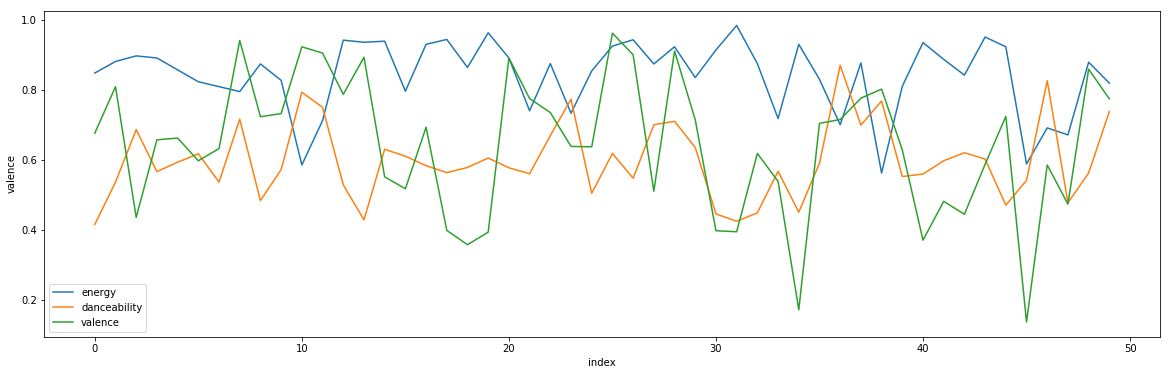

In [ ]:
plt.figure(figsize=(20,6))
sns.lineplot(data = my_spotify_df.reset_index(), x = 'index', y = 'energy', label="energy")
sns.lineplot(data = my_spotify_df.reset_index(), x = 'index', y = 'danceability', label="danceability")
sns.lineplot(data = my_spotify_df.reset_index(), x = 'index', y = 'valence', label="valence")

In [ ]:
my_spotify_df[['danceability', 'energy', 'valence']].corr()

,danceability,energy,valence
danceability,1.000000,-0.476613,0.293583
energy,-0.476613,1.000000,-0.066712
valence,0.293583,-0.066712,1.000000


## 14. Hypothesis Testing
I will look for similarities and difference in the audio features of my playlist with the audio features of the top song of the forementioned playlist.

In [ ]:
top_50_df = df.head(50)

In [ ]:
my_spotify_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.0
mean,0.598720,0.842840,4.760000,-5.032300,0.740000,0.052042,0.048837,0.025314,0.196180,0.643600,126.57894,216096.800000,4.0
std,0.108171,0.101763,3.485012,1.350942,0.443087,0.025288,0.106259,0.118169,0.136498,0.196984,22.49116,39442.567066,0.0
min,0.416000,0.563000,0.000000,-7.952000,0.000000,0.024900,0.000039,0.000000,0.050800,0.137000,99.60400,85547.000000,4.0
25%,0.538250,0.810250,1.000000,-5.805750,0.250000,0.034050,0.001055,0.000004,0.098075,0.512750,106.53525,191028.250000,4.0
50%,0.581500,0.875000,5.000000,-4.992000,1.000000,0.044000,0.006570,0.000079,0.149500,0.660500,125.46300,215360.000000,4.0
75%,0.661500,0.924000,8.000000,-3.911000,1.000000,0.058275,0.026500,0.000503,0.281750,0.776750,138.74050,245983.000000,4.0
max,0.871000,0.985000,11.000000,-2.306000,1.000000,0.141000,0.593000,0.772000,0.649000,0.963000,194.83800,303200.000000,4.0


##"Danceability" Hypothesis Testing
<p> H0 = my_spotify_df = df</p>
<p> H1 = my_spotify_df ≠ df</p>

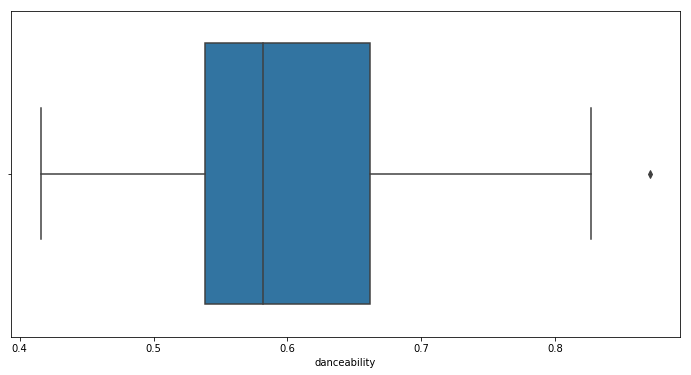

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="danceability", data=my_spotify_df)

In [ ]:
my_spotify_df['danceability'].describe()

count    50.000000
mean      0.598720
std       0.108171
min       0.416000
25%       0.538250
50%       0.581500
75%       0.661500
max       0.871000
Name: danceability, dtype: float64

##Due to the low standard deviation in danceability, spread of data must be low.

In [ ]:
my_very=my_spotify_df['danceability']>=0.70
my_regular=(my_spotify_df['danceability']>=0.5) & (my_spotify_df['danceability']<0.70)
my_poor=my_spotify_df['danceability']<0.5
data=[my_very.sum(),my_regular.sum(),my_poor.sum()]
my_dance=pd.DataFrame(data,columns=['Count'],
                   index=['Very','Regular','Poor'])
my_dance

,Count
Very,11
Regular,30
Poor,9


##I guess I don't dance as much as I think I do 22% of my playlist highly danceable.

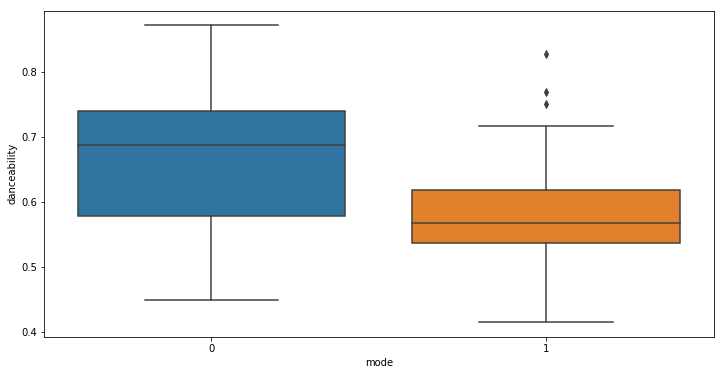

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(y="danceability", x="mode", data=my_spotify_df)

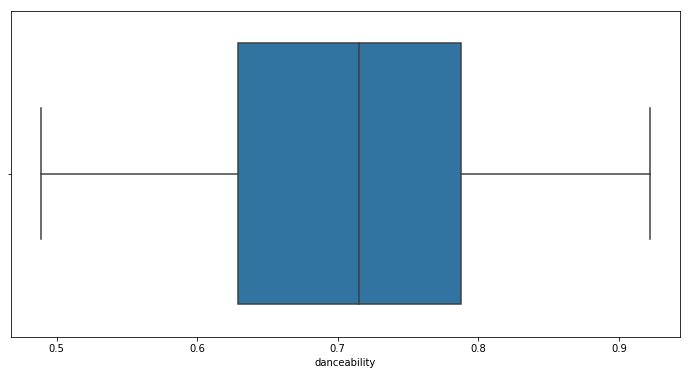

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="danceability", data=top_50_df)

##What makes this playlist unique has dancability starting at around 0.5. The lowest 50 streamed songs have more highly danceable songs than the top 50. 

In [ ]:
top_very=top_50_df['danceability']>=0.70
top_regular=(top_50_df['danceability']>=0.5) & (top_50_df['danceability']<0.70)
top_poor=top_50_df['danceability']<0.5
data=[top_very.sum(),top_regular.sum(),top_poor.sum()]
top_dance=pd.DataFrame(data,columns=['Count'],
                   index=['Very','Regular','Poor'])
top_dance

,Count
Very,28
Regular,21
Poor,1


##56% of this playlist dancable, definately more danceable than my playlist.

In [ ]:
stats.ttest_ind(my_spotify_df['danceability'], df['danceability']) 

Ttest_indResult(statistic=-5.4838959233352, pvalue=1.7543930566309485e-07)

##Due to the low pvalue, reject the null hypothesis. The playlists are statisically different in means from the other playlist. With respectability to danceability, the other playlist are more danceable than mine. But those stats will not stop me from having my own personal dance party using my playlist.

##"Energy" Hypothesis Testing
<p> H0 = my_spotify_df = df</p>
<p> H1 = my_spotify_df ≠ df</p>

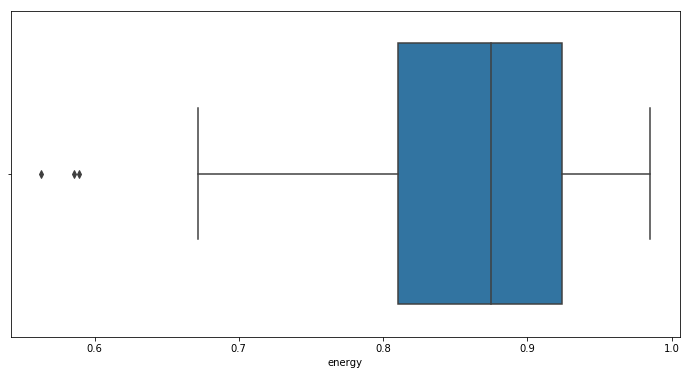

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="energy", data=my_spotify_df)

In [ ]:
my_spotify_df['energy'].describe()

count    50.000000
mean      0.842840
std       0.101763
min       0.563000
25%       0.810250
50%       0.875000
75%       0.924000
max       0.985000
Name: energy, dtype: float64

In [ ]:
my_every=my_spotify_df['energy']>=0.65
my_eregular=(my_spotify_df['energy']>=0.45) & (my_spotify_df['energy']<0.65)
my_epoor=my_spotify_df['energy']<0.45
data=[my_every.sum(),my_eregular.sum(),my_epoor.sum()]
my_energy=pd.DataFrame(data,columns=['Count'],
                   index=['Very','Regular','Poor'])
my_energy

,Count
Very,47
Regular,3
Poor,0


##My playlist has a lot of energy. 94% are high energy.

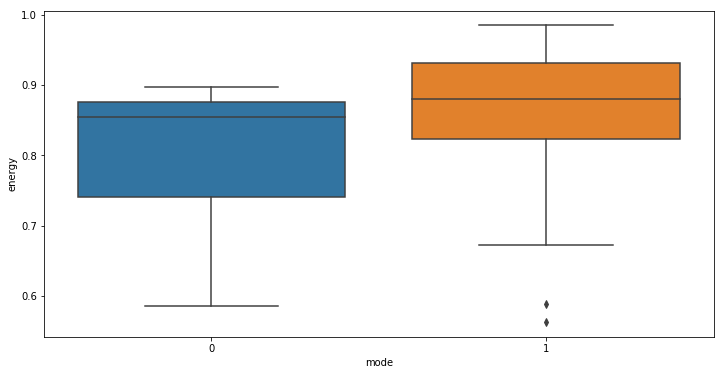

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(y="energy", x="mode", data=my_spotify_df)

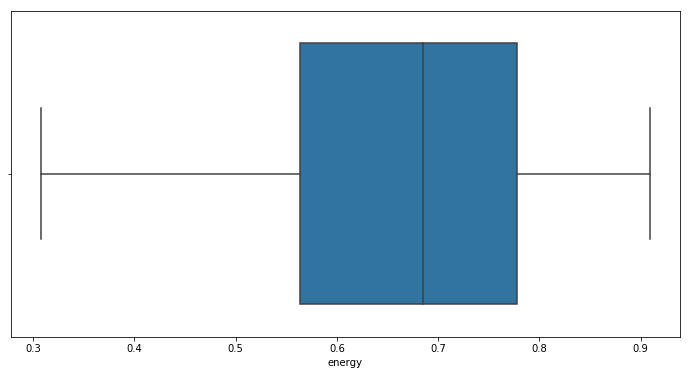

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="energy", data=top_50_df)

In [ ]:
top_every=top_50_df['energy']>=0.65
top_eregular=(top_50_df['energy']>=0.45) & (top_50_df['energy']<0.65)
top_epoor=top_50_df['energy']<0.45
data=[top_every.sum(),top_eregular.sum(),top_epoor.sum()]
top_energy=pd.DataFrame(data,columns=['Count'],
                   index=['Very','Regular','Poor'])
top_energy

,Count
Very,29
Regular,17
Poor,4


##58% of the playlist has high energy.

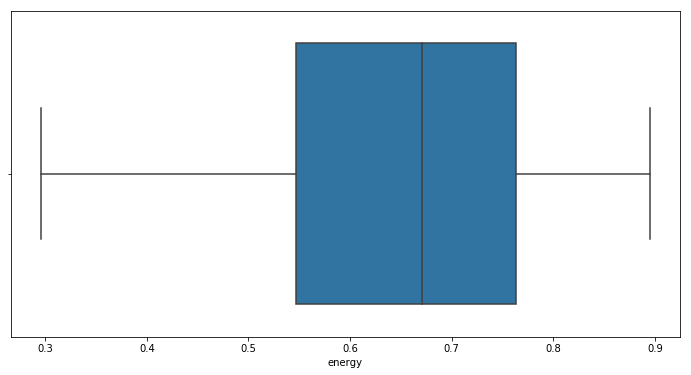

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="energy", data=bottom_50_df)

In [ ]:
stats.ttest_ind(my_spotify_df['energy'], top_50_df['energy']) 

Ttest_indResult(statistic=6.883625257911707, pvalue=5.582301372352348e-10)

##Due to the low pvalue, reject the null hypothesis. My playlist is stastically different in means from the other playlist. With respectability to energy, my playlist has more energy. 

##Hypothesis Testing
<p> H0 = My Spotify playlist is not show positive emotion </p>
<p> H1 = My Spotify playlist does show positive emotion </p>

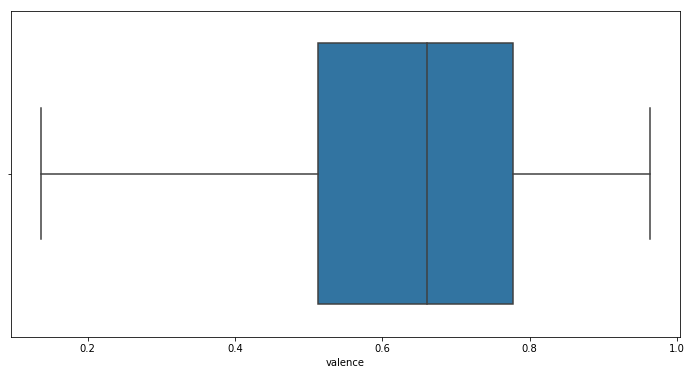

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="valence", data=my_spotify_df)

In [ ]:
my_vpositive=my_spotify_df['valence']>=0.65
my_vneutral=(my_spotify_df['valence']>=0.35) & (my_spotify_df['valence']<0.65)
my_vnegative=my_spotify_df['valence']<0.35
data=[my_vpositive.sum(),my_vneutral.sum(),my_vnegative.sum()]
my_valence=pd.DataFrame(data,columns=['Percent'],
                   index=['Positive','Neutral','Negative'])
my_valence

,Percent
Positive,26
Neutral,22
Negative,2


##52% of my playlist is considered positive.

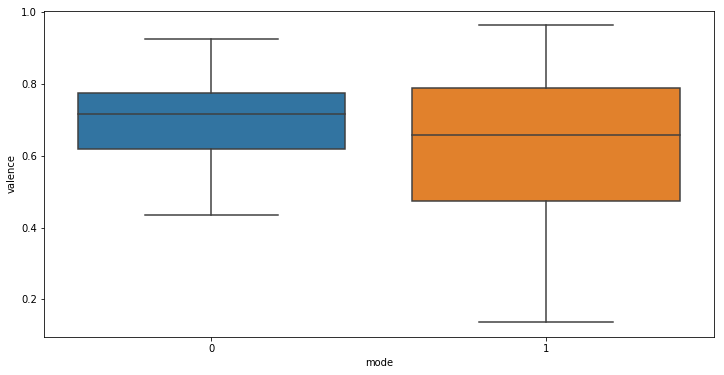

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(y="valence", x="mode", data=my_spotify_df)

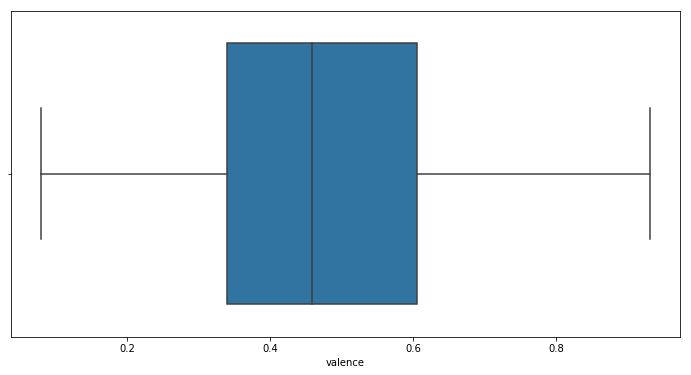

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="valence", data=top_50_df)

In [ ]:
top_vpositive=top_50_df['valence']>=0.65
top_vneutral=(top_50_df['valence']>=0.35) & (top_50_df['valence']<0.65)
top_vnegative=top_50_df['valence']<0.35
data=[top_vpositive.sum(),top_vneutral.sum(),top_vnegative.sum()]
top_valence=pd.DataFrame(data,columns=['Percent'],
                   index=['Positive','Neutral','Negative'])
top_valence

,Percent
Positive,11
Neutral,25
Negative,14


## Only 22% of playlist is considered positive.

In [ ]:
stats.ttest_ind(my_spotify_df['valence'], top_50_df['valence']) 

Ttest_indResult(statistic=4.169791752533487, pvalue=6.588263716797995e-05)

##Due to the low pvalue, reject the null hypothesis. My playlist is stastically different in means from the other playlist. Clearly my playlist is more positive than the other playlist.

##My Playlist Conclusion

##Based upon my findings I can assume my playlist is great for highly energetic music with positive tunes, but according to statistics not the best to dance to. So let me conclude my findings, when it comes to dancing, statistics lie.